# <b>How to - Deep Learning para identificação de imagens RGB</b> 

Autor: <b>Thiago Vilarinho Lemes</b> <br>
Data: 13/11/2022 <br>
e-mail: contatothiagolemes@gmail.com  <br>
LinkedIn: https://www.linkedin.com/in/thiago-vilarinho-lemes-b1232727/

<b>Descrição</b>: Este <i>How to</i> tem como objetivo ter uma referência para classificar imagens utilizando a biblioteca <i>KERAS</i> com <i>VGG16</i>, <i>VGG19</i>, <i>Xception</i> e <i>DenseNet</i> de figuras RGB.

<b>Ref.: </b>https://keras.io/api/applications/

In [ ]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importando as bibliotecas

In [ ]:
from tensorflow.keras.preprocessing import image # Biblioteca do Keras para trabalhar com imagens
from tensorflow.keras.applications import vgg16 ## Importando a bibliotea VGG16 do keras para trabalhar com Deep Learning
from tensorflow.keras.applications import xception  ## Importando a bibliotea Xception do keras para trabalhar com Deep Learning
from tensorflow.keras.applications import densenet  ## Importando a bibliotea DenseNet do keras para trabalhar com Deep Learning
from tensorflow.keras.applications import vgg19 ## Importando a bibliotea VGG19 do keras para trabalhar com Deep Learning

import pandas as pd
import numpy as np

# Treinando o algoritmo VGG16 do Keras

## Carregando a imagem

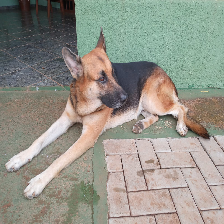

In [ ]:
img_dog_vgg16 = image.load_img('/content/drive/MyDrive/Pos-Graduacao/imagens/cachorro_02.jpeg', target_size=(224, 224), keep_aspect_ratio=False)
img_dog_vgg16

## Transformando a imagem do vetor (224, 224) em array

shape: (1, 224, 224, 3)



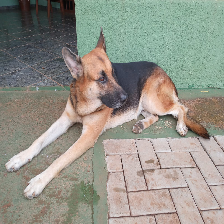

In [ ]:
x_dog_vgg16 = image.img_to_array(img_dog_vgg16) 
x_dog_vgg16 = np.expand_dims(x_dog_vgg16, axis=0)

print('shape:', x_dog_vgg16.shape)
print()
img_dog_vgg16

## Fazendo Convolução com o algoritmo VGG16

In [ ]:
# weights - é o peso que neste caso está utilizando da base de dados da Imagenet da Internet 
# I VGG16 Possui: 
#   - Acurácia: 71.3%
#   - Parametros: 138.4 Milhões
#   - Depth(profundidade): 16 
model = vgg16.VGG16(
    weights='imagenet',
    classes=1000
)

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Pré-processamento para fazer o predict

In [ ]:
# Pre processamento, é necessário
x_prep_vgg16 = vgg16.preprocess_input(x_dog_vgg16)
# Faz o predict
pred_vgg16 = model.predict(x_prep_vgg16)

1/1 [==============================] - 1s 859ms/step


In [ ]:
pred_vgg16.shape

(1, 1000)

## Buscando o maior valor possível da raça

In [ ]:
np.argmax(pred_vgg16), pred_vgg16[:, np.argmax(pred_vgg16)]

(235, array([0.57806605], dtype=float32))

## Selecionando as TOP 5 possíveis raças com VGG16


In [ ]:
top5_dog_vgg16 = vgg16.decode_predictions(pred_vgg16, top=5)

## Criando Dataframe com as TOP 5 possíveis raças com VGG16

In [ ]:
df_VGG16 = pd.DataFrame(top5_dog_vgg16[0], columns=['Código', 'Raça', 'Percentual'])
df_VGG16

,Código,Raça,Percentual
0,n02106662,German_shepherd,0.578066
1,n02105162,malinois,0.400362
2,n02105412,kelpie,0.003497
3,n02109047,Great_Dane,0.002756
4,n04409515,tennis_ball,0.001737


In [ ]:
df_VGG16['Algoritmo'] = 'VGG16'

In [ ]:
df_VGG16

,Código,Raça,Percentual,Algoritmo
0,n02106662,German_shepherd,0.578066,VGG16
1,n02105162,malinois,0.400362,VGG16
2,n02105412,kelpie,0.003497,VGG16
3,n02109047,Great_Dane,0.002756,VGG16
4,n04409515,tennis_ball,0.001737,VGG16


In [ ]:
# ==================================================================================================================== #
# ==================================================================================================================== #
# ==================================================================================================================== #

# Treinando o algoritmo Xception do Keras

## Carregando Imagem

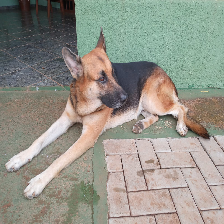

In [ ]:
img_dog_xception = image.load_img('/content/drive/MyDrive/Pos-Graduacao/imagens/cachorro_02.jpeg', target_size=(224, 224), keep_aspect_ratio=False)
img_dog_xception

## Transformando a imagem do vetor (224, 224) em array

In [ ]:
x_dog_xception = image.img_to_array(img_dog_xception) 
x_dog_xception = np.expand_dims(x_dog_xception, axis=0)

print('shape:', x_dog_xception.shape)
print()

shape: (1, 224, 224, 3)



## Fazendo a Covolução do Xception

In [ ]:
# weights - é o peso que neste caso está utilizando da base de dados da Imagenet da Internet 
# I Xception Possui: 
#   - Acurácia: 79.0%
#   - Parametros: 22.9 Milhões
#   - Depth(profundidade): 81 
model_xception = xception.Xception(
    weights='imagenet',
    classes=1000,
)
model_xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

## Pré-processamento para fazer o predict

In [ ]:
# Pre processamento, é necessário
x_prep_xception = xception.preprocess_input(x_dog_xception)
# Faz o predict
pred_xception = model.predict(x_prep_xception)

1/1 [==============================] - 1s 1s/step


## Buscando o maior valor possível da raça

In [ ]:
np.argmax(pred_xception), pred_xception[:, np.argmax(pred_xception)]

(669, array([0.14166744], dtype=float32))

## Selecionando as TOP 5 possíveis raças com Xception

In [ ]:
top5_dog_Xception = xception.decode_predictions(pred_xception, top=5)

## Criando o Dataframe com as Top 5 possíveis raças

In [ ]:
df_XCEPTION = pd.DataFrame(top5_dog_Xception[0], columns=['Código', 'Raça', 'Percentual'])
df_XCEPTION

,Código,Raça,Percentual
0,n03788365,mosquito_net,0.141667
1,n02091134,whippet,0.028419
2,n15075141,toilet_tissue,0.022356
3,n02091032,Italian_greyhound,0.017151
4,n04209239,shower_curtain,0.014948


In [ ]:
df_XCEPTION['Algoritmo'] = 'Xception'
df_XCEPTION

,Código,Raça,Percentual,Algoritmo
0,n03788365,mosquito_net,0.141667,Xception
1,n02091134,whippet,0.028419,Xception
2,n15075141,toilet_tissue,0.022356,Xception
3,n02091032,Italian_greyhound,0.017151,Xception
4,n04209239,shower_curtain,0.014948,Xception


In [ ]:
# ==================================================================================================================== #
# ==================================================================================================================== #
# ==================================================================================================================== #

# Treinando o algoritmo VGG19 do Keras 

## Carregando a imagem

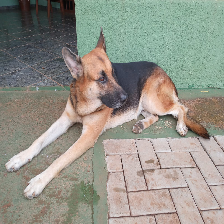

In [ ]:
img_dog_vgg19 = image.load_img('/content/drive/MyDrive/Pos-Graduacao/imagens/cachorro_02.jpeg', target_size=(224, 224), keep_aspect_ratio=False)
img_dog_vgg19

## Transformando a imagem do vetor (224, 224) em array

In [ ]:
x_dog_vgg19 = image.img_to_array(img_dog_vgg19) 
x_dog_vgg19 = np.expand_dims(x_dog_vgg19, axis=0)

print('shape:', x_dog_vgg19.shape)
print()

shape: (1, 224, 224, 3)



## Fazendo a Convolução 

In [ ]:
# weights - é o peso que neste caso está utilizando da base de dados da Imagenet da Internet 
# I VGG19 Possui: 
#   - Acurácia: 71.3%
#   - Parametros: 143.7 Milhões
#   - Depth(profundidade): 19 
model_vgg = vgg19.VGG19(
    weights='imagenet',
    classes=1000,
)
model_xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

## Pré-processamento para fazer o predict

In [ ]:
# Pre processamento, é necessário
x_prep_vgg19 = vgg19.preprocess_input(x_dog_vgg19)
# Faz o predict
pred_vgg19 = model.predict(x_prep_vgg19)

1/1 [==============================] - 1s 1s/step


## Buscando o maior valor no Predict

In [ ]:
np.argmax(pred_vgg19), pred_vgg19[:, np.argmax(pred_vgg19)]

(235, array([0.57806605], dtype=float32))

## Selecionando as TOP 5 possíveis raças com VGG19

In [ ]:
top5_dog_vgg19 = vgg19.decode_predictions(pred_vgg19, top=5)

## Criando o Dataframe com as Top 5 possíveis raças

In [ ]:
df_VGG19 = pd.DataFrame(top5_dog_vgg19[0], columns=['Código', 'Raça', 'Percentual'])
df_VGG19

,Código,Raça,Percentual
0,n02106662,German_shepherd,0.578066
1,n02105162,malinois,0.400362
2,n02105412,kelpie,0.003497
3,n02109047,Great_Dane,0.002756
4,n04409515,tennis_ball,0.001737


In [ ]:
df_VGG19['Algoritmo'] = 'VGG19'

In [ ]:
df_VGG19

,Código,Raça,Percentual,Algoritmo
0,n02106662,German_shepherd,0.578066,VGG19
1,n02105162,malinois,0.400362,VGG19
2,n02105412,kelpie,0.003497,VGG19
3,n02109047,Great_Dane,0.002756,VGG19
4,n04409515,tennis_ball,0.001737,VGG19


In [ ]:
# ==================================================================================================================== #
# ==================================================================================================================== #
# ==================================================================================================================== #

# Treinando o algoritmo DenseNet201

## Carregando a imagem

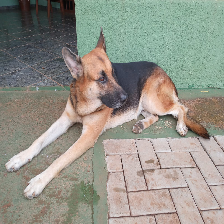

In [ ]:
img_dog_densenet = image.load_img('/content/drive/MyDrive/Pos-Graduacao/imagens/cachorro_02.jpeg', target_size=(224, 224), keep_aspect_ratio=False)
img_dog_densenet

## Transformando a imagem do vetor (224, 224) em array

In [ ]:
x_dog_densenet = image.img_to_array(img_dog_densenet) 
x_dog_densenet = np.expand_dims(x_dog_densenet, axis=0)

print('shape:', x_dog_densenet.shape)
print()

shape: (1, 224, 224, 3)



## Fazendo a Convolução

In [ ]:
# weights - é o peso que neste caso está utilizando da base de dados da Imagenet da Internet 
# I VGG16 Possui: 
#   - Acurácia: 77.3%
#   - Parametros: 20.2 Milhões
#   - Depth(profundidade): 402 
model = densenet.DenseNet201(
    weights='imagenet',
    classes=1000,
)

model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_4[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

## Pré-processamento para fazer o predict

In [ ]:
# Pre processamento, é necessário
x_prep_densenet = densenet.preprocess_input(x_dog_densenet)
# Faz o predict
pred_densenet = model.predict(x_prep_densenet)

1/1 [==============================] - 6s 6s/step


## Buscando o maior valor no Predict

In [ ]:
np.argmax(pred_densenet), pred_vgg19[:, np.argmax(pred_densenet)]

(235, array([0.57806605], dtype=float32))

## Selecionando as TOP 5 possíveis raças com DenseNet201

In [ ]:
top5_dog_densenet = densenet.decode_predictions(pred_densenet, top=5)

## Criando o Dataframe com as Top 5 possíveis raças

In [ ]:
df_DenseNet = pd.DataFrame(top5_dog_densenet[0], columns=['Código', 'Raça', 'Percentual'])
df_DenseNet

,Código,Raça,Percentual
0,n02106662,German_shepherd,0.861655
1,n02105162,malinois,0.103211
2,n02109047,Great_Dane,0.009080
3,n02105412,kelpie,0.005243
4,n02115641,dingo,0.003582


In [ ]:
df_DenseNet['Algoritmo'] = 'DenseNet'
df_DenseNet

,Código,Raça,Percentual,Algoritmo
0,n02106662,German_shepherd,0.861655,DenseNet
1,n02105162,malinois,0.103211,DenseNet
2,n02109047,Great_Dane,0.009080,DenseNet
3,n02105412,kelpie,0.005243,DenseNet
4,n02115641,dingo,0.003582,DenseNet


In [ ]:
# ==================================================================================================================== #
# ==================================================================================================================== #
# ==================================================================================================================== #

# Concatenando os Dataframes

In [ ]:
df = pd.concat([df_VGG16, df_VGG19, df_DenseNet, df_XCEPTION])
df

,Código,Raça,Percentual,Algoritmo
0,n02106662,German_shepherd,0.578066,VGG16
1,n02105162,malinois,0.400362,VGG16
2,n02105412,kelpie,0.003497,VGG16
3,n02109047,Great_Dane,0.002756,VGG16
4,n04409515,tennis_ball,0.001737,VGG16
0,n02106662,German_shepherd,0.578066,VGG19
1,n02105162,malinois,0.400362,VGG19
2,n02105412,kelpie,0.003497,VGG19
3,n02109047,Great_Dane,0.002756,VGG19
4,n04409515,tennis_ball,0.001737,VGG19
